<a href="https://colab.research.google.com/github/ashikjoel/Object-Recognition-System-/blob/main/object_recognition_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

zip_file_path = "/content/drive/MyDrive/coco2017_subset.zip"
extract_dir = "/content"

if os.path.exists(zip_file_path):
    try:
        # Create a ZipFile object
        with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
            # Extract all contents to the specified directory
            zip_ref.extractall(extract_dir)
        print(f"Successfully extracted '{zip_file_path}' to '{extract_dir}'")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_file_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"Error: '{zip_file_path}' does not exist.")

Successfully extracted '/content/drive/MyDrive/coco2017_subset.zip' to '/content'


In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import pathlib

import os

import glob as gb

import glob

import cv2

import tensorflow as tf

In [ ]:
# Path to your dataset directory
dataset_path = '/content/coco2017_subset/train2017'  # Update this path if needed

# Check if the directory exists
if not os.path.exists(dataset_path):
    print(f"Error: The directory {dataset_path} does not exist.")
else:
    # Count all files (assuming all are images)
    num_images = len([f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))])

    print(f"Total number of images in train dataset: {num_images}")



Total number of images in train dataset: 29571


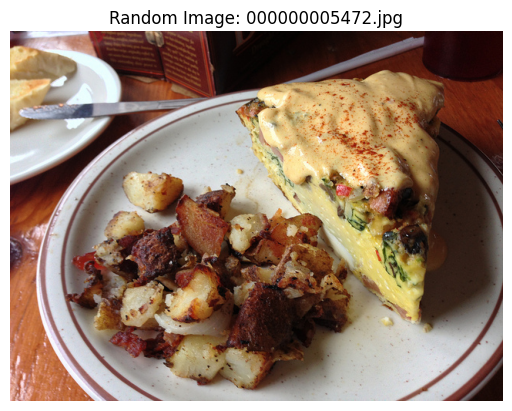

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Path to your dataset directory
dataset_path = '/content/coco2017_subset/train2017'  # Update this to your actual path

# Check if the directory exists
if not os.path.exists(dataset_path):
    print(f"Error: The directory {dataset_path} does not exist.")
else:
    # Get all image files from the directory
    image_files = [f for f in os.listdir(dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("No images found in the dataset directory.")
    else:
        # Pick a random image
        random_image = random.choice(image_files)
        image_path = os.path.join(dataset_path, random_image)

        # Open and display the image
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes for better visualization
        plt.title(f"Random Image: {random_image}")
        plt.show()


In [ ]:


# Path to your test dataset
test_dataset_path = '/content/coco2017_subset/test2017'

# Check if the directory exists
if not os.path.exists(test_dataset_path):
    print(f"Error: The directory {test_dataset_path} does not exist.")
else:
    # Count all image files (assuming common image formats)
    num_images = len([f for f in os.listdir(test_dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])

    print(f"Total number of images in test dataset: {num_images}")


Total number of images in test dataset: 10168


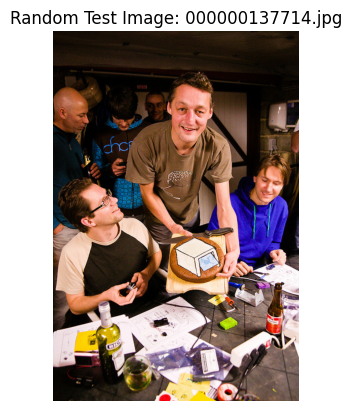

In [ ]:


# Path to your test dataset directory
test_dataset_path = '/content/coco2017_subset/test2017'

# Check if the directory exists
if not os.path.exists(test_dataset_path):
    print(f"Error: The directory {test_dataset_path} does not exist.")
else:
    # Get all image files from the directory
    image_files = [f for f in os.listdir(test_dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        print("No images found in the test dataset directory.")
    else:
        # Pick a random image
        random_image = random.choice(image_files)
        image_path = os.path.join(test_dataset_path, random_image)

        # Open and display the image
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes for better visualization
        plt.title(f"Random Test Image: {random_image}")
        plt.show()


Total number of images in validation dataset: 1250


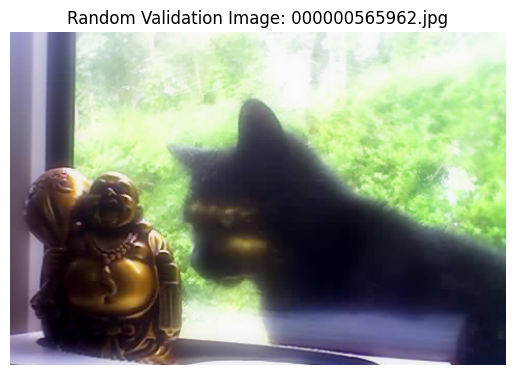

In [ ]:


# Path to your validation dataset directory
val_dataset_path = '/content/coco2017_subset/val2017'

# Check if the directory exists
if not os.path.exists(val_dataset_path):
    print(f"Error: The directory {val_dataset_path} does not exist.")
else:
    # Get all image files from the directory
    image_files = [f for f in os.listdir(val_dataset_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    # Count total images
    num_images = len(image_files)
    print(f"Total number of images in validation dataset: {num_images}")

    if not image_files:
        print("No images found in the validation dataset directory.")
    else:
        # Pick a random image
        random_image = random.choice(image_files)
        image_path = os.path.join(val_dataset_path, random_image)

        # Open and display the image
        img = Image.open(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes for better visualization
        plt.title(f"Random Validation Image: {random_image}")
        plt.show()


In [ ]:
import cv2
import os

# Input and output folders
input_folder = "/content/coco2017_subset"          # Change this to your dataset folder
output_folder = "resized_dataset" # Folder where resized images will be saved

# Create output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Set the target size
target_size = (256, 256)

# Loop through all images in the input folder
for filename in os.listdir(input_folder):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        img_path = os.path.join(input_folder, filename)
        img = cv2.imread(img_path)  # Read the image

        if img is not None:
            resized_img = cv2.resize(img, target_size)  # Resize image
            save_path = os.path.join(output_folder, filename)
            cv2.imwrite(save_path, resized_img)  # Save the resized image
            print(f"Resized and saved: {save_path}")
        else:
            print(f"Skipping {filename}, unable to read.")

print("✅ All images resized successfully!")


✅ All images resized successfully!


In [ ]:
import cv2
import numpy as np
import os

folder_path = "/content/coco2017_subset"

# Supported image file extensions
valid_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".gif")

# Function to process images inside subdirectories
def process_images(folder):
    for root, _, files in os.walk(folder):  # Walk through all subdirectories
        for filename in files:
            if filename.lower().endswith(valid_extensions):  # Only process image files
                image_path = os.path.join(root, filename)

                # Read image
                image = cv2.imread(image_path)

                if image is None:
                    print(f"Skipping {filename}: Unable to read.")
                    continue

                # Normalize pixel values to [0,1]
                normalized_image = image / 255.0

                # Convert BGR to RGB (YOLO expects RGB format)
                normalized_image = cv2.cvtColor(normalized_image.astype(np.float32), cv2.COLOR_BGR2RGB)

                print(f"Normalized {filename} successfully!")

# Run the function on the main dataset folder
if os.path.exists(folder_path):
    process_images(folder_path)
else:
    print("Error: Folder not found!")



Streaming output truncated to the last 5000 lines.
Normalized 000000075889.jpg successfully!
Normalized 000000140137.jpg successfully!
Normalized 000000128026.jpg successfully!
Normalized 000000018382.jpg successfully!
Normalized 000000105749.jpg successfully!
Normalized 000000020793.jpg successfully!
Normalized 000000023180.jpg successfully!
Normalized 000000136856.jpg successfully!
Normalized 000000003903.jpg successfully!
Normalized 000000107055.jpg successfully!
Normalized 000000038759.jpg successfully!
Normalized 000000122071.jpg successfully!
Normalized 000000008034.jpg successfully!
Normalized 000000062785.jpg successfully!
Normalized 000000004311.jpg successfully!
Normalized 000000104699.jpg successfully!
Normalized 000000102677.jpg successfully!
Normalized 000000111666.jpg successfully!
Normalized 000000105218.jpg successfully!
Normalized 000000113479.jpg successfully!
Normalized 000000123440.jpg successfully!
Normalized 000000007426.jpg successfully!
Normalized 000000053991.j

In [ ]:
import cv2
import numpy as np
import albumentations as A
import os

# Define augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),  # 50% chance of flipping horizontally
    A.RandomBrightnessContrast(p=0.3),  # Adjust brightness/contrast
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.1, rotate_limit=20, p=0.7),  # Random shifts, scaling, rotation
    A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),  # Add Gaussian noise
    A.Blur(blur_limit=3, p=0.2)  # Apply slight blur
])

# Paths
input_folder = "/content/coco2017_subset/train2017"  # Change as needed
output_folder = "/content/coco2017_augmented"

# Create output folder if not exists
os.makedirs(output_folder, exist_ok=True)

# Process all images in the folder
for filename in os.listdir(input_folder):
    image_path = os.path.join(input_folder, filename)

    # Read image
    image = cv2.imread(image_path)

    if image is None:
        print(f"Skipping {filename}: Unable to read.")
        continue

    # Convert BGR to RGB (Albumentations expects RGB format)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply augmentation
    augmented = augmentations(image=image)['image']

    # Convert back to BGR for saving
    augmented = cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR)

    # Save augmented image
    output_path = os.path.join(output_folder, f"aug_{filename}")
    cv2.imwrite(output_path, augmented)

    print(f"Augmented {filename} saved to {output_folder}")


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.5' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:58: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
<ipython-input-13-37e05a49b2b3>:11: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3),  # Add Gaussian noise


Streaming output truncated to the last 5000 lines.
Augmented 000000243091.jpg saved to /content/coco2017_augmented
Augmented 000000380905.jpg saved to /content/coco2017_augmented
Augmented 000000224244.jpg saved to /content/coco2017_augmented
Augmented 000000483851.jpg saved to /content/coco2017_augmented
Augmented 000000098709.jpg saved to /content/coco2017_augmented
Augmented 000000285285.jpg saved to /content/coco2017_augmented
Augmented 000000485985.jpg saved to /content/coco2017_augmented
Augmented 000000068242.jpg saved to /content/coco2017_augmented
Augmented 000000501959.jpg saved to /content/coco2017_augmented
Augmented 000000254082.jpg saved to /content/coco2017_augmented
Augmented 000000369296.jpg saved to /content/coco2017_augmented
Augmented 000000565691.jpg saved to /content/coco2017_augmented
Augmented 000000210024.jpg saved to /content/coco2017_augmented
Augmented 000000065829.jpg saved to /content/coco2017_augmented
Augmented 000000301764.jpg saved to /content/coco2017

In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 923.8/923.8 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import torch
print("CUDA Available:", torch.cuda.is_available())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU found")
print(torch.version.cuda)

CUDA Available: True
GPU Name: Tesla T4
12.4


In [ ]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 350MB/s]


In [ ]:
import json
import os

# Path to COCO annotation file and output folder for YOLO labels
coco_ann_file_train = r"/content/coco2017_subset/annotation_subset/instances_train2017_subset.json"
output_dir_train = "/content/coco2017_subset/train2017"
coco_ann_file_val = r"/content/coco2017_subset/annotation_subset/instances_val2017_subset.json"
output_dir_val = "/content/coco2017_subset/val2017"
# os.makedirs(output_dir, exist_ok=True)

In [ ]:
def annotation_convertion(coco_ann_file,output_dir):

  # Load COCO annotations
  with open(coco_ann_file, 'r') as f:
      coco_data = json.load(f)

  # Create mapping: COCO category id -> new id (0-based contiguous indices)
  # For example, if valid categories are 1, 2, 3, 5, 6, ... then you might have:
  coco_categories = sorted([cat['id'] for cat in coco_data['categories']])
  id_mapping = {orig_id: new_id for new_id, orig_id in enumerate(coco_categories)}

  # Build a mapping from image_id to image info
  img_info = {img['id']: img for img in coco_data['images']}

  # Process annotations per image
  annotations_by_image = {}
  for ann in coco_data['annotations']:
      img_id = ann['image_id']
      img = img_info[img_id]
      img_width, img_height = img['width'], img['height']

      x, y, w, h = ann['bbox']
      # Convert COCO bbox [x, y, w, h] to YOLO format [x_center, y_center, width, height] normalized
      x_center = (x + w / 2) / img_width
      y_center = (y + h / 2) / img_height
      norm_w = w / img_width
      norm_h = h / img_height

      # Remap the category id
      orig_cat = ann['category_id']
      if orig_cat not in id_mapping:
          continue  # skip if the category is not in the mapping
      new_cat = id_mapping[orig_cat]

      if img_id not in annotations_by_image:
          annotations_by_image[img_id] = []
      annotations_by_image[img_id].append(f"{new_cat} {x_center:.6f} {y_center:.6f} {norm_w:.6f} {norm_h:.6f}")

      # Write YOLO label files for each image
  for img_id, ann_list in annotations_by_image.items():
      file_name = img_info[img_id]['file_name']
      base_name = os.path.splitext(file_name)[0]
      # Save the label file in the same directory as your images, or wherever you prefer
      out_file = os.path.join(output_dir, base_name + '.txt')
      with open(out_file, 'w') as f:
          for line in ann_list:
              f.write(line + '\n')

In [ ]:
annotation_convertion(coco_ann_file_train,output_dir_train)

In [ ]:
annotation_convertion(coco_ann_file_val,output_dir_val)

In [ ]:
import os
import yaml

# Define target directory for COCO dataset
output_dir = '/content/coco2017_subset'
# Ensure the directory exists
os.makedirs(output_dir, exist_ok=True)

# COCO 2017 dataset configuration
data = {
    'path': output_dir,  # Base path to the dataset
    'train': '/content/coco2017_subset/train2017',  # Relative path to training images
    'val': '/content/coco2017_subset/val2017',  # Relative path to validation images
    'test': '/content/coco2017_subset/test2017',  # Relative path to test images (optional)

    'nc': 80,  # Number of classes in COCO dataset

    # Official COCO 2017 class names in order
    'names': [
        'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train',
        'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
        'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
        'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite',
        'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
        'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
        'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
        'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
        'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]
}

# Path to save data.yaml
yaml_path = os.path.join(output_dir, 'data.yaml')

# Write YAML file
with open(yaml_path, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print(f"✅ data.yaml saved at: {yaml_path}")

✅ data.yaml saved at: /content/coco2017_subset/data.yaml


In [ ]:
data_yaml='/content/coco2017_subset/data.yaml'
epochs=2
img_size=640
batch_size=2

In [ ]:
print("Starting Yolo Training")
# Change device to 'cpu' if cuda is unavailable
res = model.train(data=data_yaml, epochs=epochs, imgsz=img_size, batch=batch_size, device=0)
print("Training completed")

Starting Yolo Training
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/coco2017_subset/data.yaml, epochs=2, time=None, patience=100, batch=2, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True,

train: Scanning /content/coco2017_subset/train2017.cache... 29315 images, 256 backgrounds, 0 corrupt: 100%|██████████| 29571/29571 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/coco2017_subset/val2017.cache... 1237 images, 13 backgrounds, 0 corrupt: 100%|██████████| 1250/1250 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2     0.543G      1.199      1.621      1.279         17        640: 100%|██████████| 14786/14786 [29:35<00:00,  8.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:19<00:00, 16.31it/s]


                   all       1250       9236      0.603      0.463      0.492      0.338

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2     0.574G      1.189      1.581      1.271          3        640: 100%|██████████| 14786/14786 [28:17<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:20<00:00, 15.41it/s]


                   all       1250       9236      0.598      0.457      0.491      0.341

2 epochs completed in 0.978 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.87 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [00:15<00:00, 19.99it/s]


                   all       1250       9236      0.597      0.458      0.491      0.341
                person        670       2607       0.78      0.601      0.705       0.48
               bicycle         34         75      0.505       0.32      0.348      0.229
                   car        132        457      0.706      0.442      0.514      0.296
            motorcycle         36         88      0.555      0.523      0.542      0.322
              airplane         23         43      0.677       0.83      0.826      0.599
                   bus         43         55      0.745      0.764       0.76      0.669
                 train         48         60      0.833      0.783      0.847      0.658
                 truck         56         96      0.535      0.336      0.402      0.251
                  boat         30        107      0.385      0.222      0.299      0.157
         traffic light         53        176       0.63      0.335        0.4      0.215
          fire hydran

In [ ]:
model.save('best_yolo.pt')

In [ ]:
from google.colab import files

files.download('best_yolo.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.download('best_yolo.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/best_yolo.pt")

# Print model details
model.info()



YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)


image 1/1 /content/coco2017_subset/test2017/000000000128.jpg: 640x512 1 elephant, 47.8ms
Speed: 1.5ms preprocess, 47.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs/detect/my_results
Detected Images: ['/content/runs/detect/my_results/000000005217.jpg', '/content/runs/detect/my_results/000000006775.jpg', '/content/runs/detect/my_results/000000000128.jpg', '/content/runs/detect/my_results/000000003440.jpg']
Displaying: /content/runs/detect/my_results/000000000128.jpg


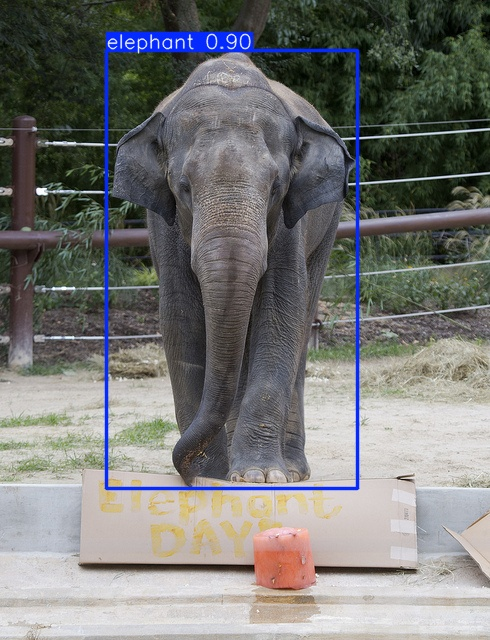

In [ ]:
from ultralytics import YOLO
from IPython.display import display
from PIL import Image
import glob

# Load your trained YOLO model
model = YOLO("/content/best_yolo.pt")  # Ensure the correct path

# Define the image path
image_path = "/content/coco2017_subset/test2017/000000000128.jpg"

# Run object detection and force save in "runs/detect/my_results"
results = model(image_path, save=True, project="runs/detect", name="my_results", exist_ok=True)

# Find the exact detected image
detected_images = glob.glob("/content/runs/detect/my_results/*.jpg")
print("Detected Images:", detected_images)  # Debugging: See all detected images

# Display the correct detected image
for img_path in detected_images:
    if "128" in img_path:  # Ensure it matches the correct image
        print("Displaying:", img_path)
        display(Image.open(img_path))
        break



image 1/1 /content/coco2017_subset/test2017/000000000183.jpg: 448x640 1 person, 3 bottles, 1 wine glass, 1 dining table, 16.9ms
Speed: 3.3ms preprocess, 16.9ms inference, 3.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/my_results
Detected Images: ['/content/runs/detect/my_results/000000005217.jpg', '/content/runs/detect/my_results/000000006775.jpg', '/content/runs/detect/my_results/000000000183.jpg', '/content/runs/detect/my_results/000000000128.jpg', '/content/runs/detect/my_results/000000003440.jpg']
Displaying: /content/runs/detect/my_results/000000000183.jpg


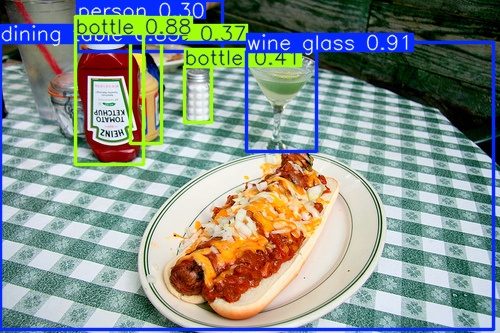

In [ ]:
from ultralytics import YOLO
from IPython.display import display
from PIL import Image
import glob

# Load your trained YOLO model
model = YOLO("/content/best_yolo.pt")  # Ensure the correct path

# Define the image path
image_path = "/content/coco2017_subset/test2017/000000000183.jpg"

# Run object detection and force save in "runs/detect/my_results"
results = model(image_path, save=True, project="runs/detect", name="my_results", exist_ok=True)

# Find the exact detected image
detected_images = glob.glob("/content/runs/detect/my_results/*.jpg")
print("Detected Images:", detected_images)  # Debugging: See all detected images

# Display the correct detected image
for img_path in detected_images:
    if "183" in img_path:  # Ensure it matches the correct image
        print("Displaying:", img_path)
        display(Image.open(img_path))
        break
